<a href="https://colab.research.google.com/github/talhaDS04/pytorch-week4/blob/main/01_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PyTorch workflow

let's explore an example pyTorch end to end workflow.<br>
Resource Book link : https://www.learnpytorch.io/00_pytorch_fundamentals/<br>
Ground Truth : https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/regression-data.csv<br>
Ask a question : https://www.learnpytorch.io/00_pytorch_fundamentals/

In [133]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

In [134]:
what_were_covering = {
    1 : "data (prepare and load)",
    2 : "build model",
    3 : "fitting the model to data (training)",
    4 : "making predictions and evaluating a model (inference)",
    5 : "saving and loading a model",
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model'}

In [135]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#check python version
torch.__version__

'2.6.0+cu124'

## 1.Data  (preparing and loading )

ML is a game of 2 parts <br>
1. Get data into numerical representation <br>
2. learn patterns in that numerical representation

To showcase this , let's create some *known* data using the linear regression.<br>
we use linear regression formula to make a straight line with known *parameters*.

In [136]:
#Create *known* parameters
weight = 0.7
bias = 0.3

#Create data
start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [137]:
len(X), len (y)

(50, 50)

###Split data into training and testing data.

In [138]:
#Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [139]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #plot testing data in green
  plt.scatter(test_data, test_data , c='g' , s=4,label="testing data")

  # Are  there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #show legend
  plt.legend(prop={"size": 14})

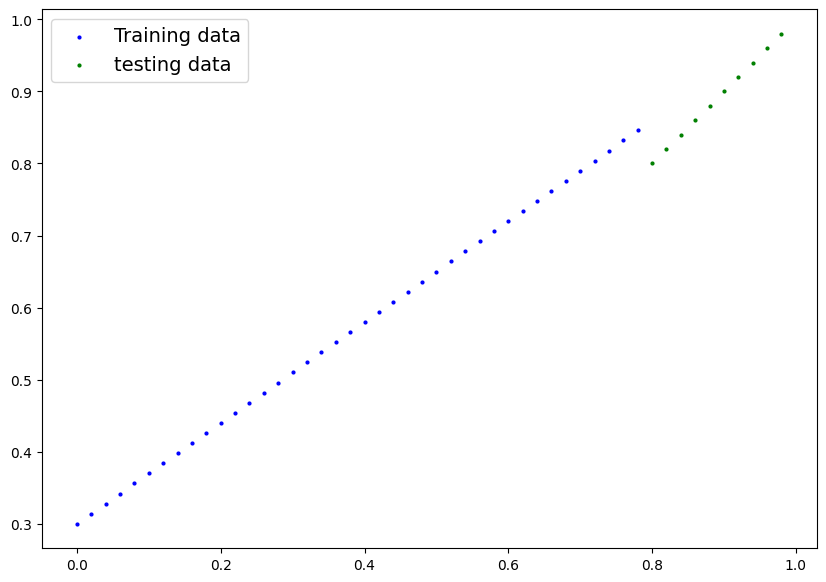

In [140]:
plot_predictions()

## 2.Build Model

1. Building our first pytorch model

In [141]:
#create linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True, #gradiant decent and back propagation working here
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

###Pytorch model building essantials

1. torch.nn -> Contains all the building block for computationals graph.
2. torch.nn.parameter -> what parameter should our model try and learn.
3. torch.nn.module -> base class for all neural network.
4. torch.optim -> this where the optimizers in pyTorch live, they will help with gradiant descent
5. def forward() -> defines the computation in the model.

###Checking the contents of pyTorch Models

Now we've created a model, let's whats inside...


In [142]:
#create a random seed
torch.manual_seed(42)

#Create a model
model_0 = LinearRegressionModel()

#check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [143]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [144]:
weight, bias

(0.7, 0.3)

###Making Prediction using torch.inference_model()


In [145]:
#Make prediction model
with torch.inference_mode(): #turn off gradiant tracking , cal write torch.no_grad() , do the same as torch.inference_mode()
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [146]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

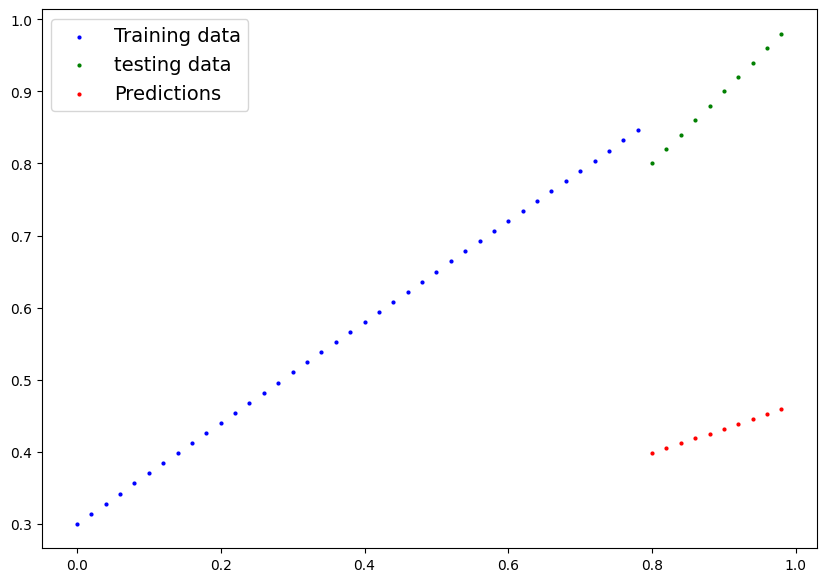

In [147]:
plot_predictions(predictions=y_preds)

## 3  Train Model

The whole idea is to convert model from "unknown" parameters to "known" parameter.

One way to measure how poor your model predictions are is to use a **loss function.**

*Optimizer* Takes into account the loss of a model and adjust the model's parameters.

And specifically we need
1. Training loop
2. testing loop

In [148]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [149]:
#setup a loss function
loss_fn = nn.L1Loss() #L1Loss = MAE

#setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) #important hypermeter

###building an training loop(and testing loop) in pyTorch.

couple of things for training loop
1. loop through the data
2. do forward pass for making preictions
3. calculate the loss - compare forward pass.
4.optimize zero_grad
5. loss backward-move backward through the network for calculating the gradiant.
6. optimizer step- use the optimizer to adjust the parameters.

In [150]:
torch.manual_seed(42)

#An epoch is one loop through the data...
epochs = 200

# Track different values
epoch_count = []
train_loss_values = []
test_loss_values = []

###Training
# 0.Loop through the data
for epoch in range(epochs):
  #set the model to training mode
   model_0.train()

  #1. forward pass
   y_pred = model_0(X_train)

  #2. calculate the loss
   loss = loss_fn(y_pred,y_train)

  #3. optimizer zero_grad
   optimizer.zero_grad()

  #4. loss backward
   loss.backward()

  #5. optimizer step
   optimizer.step()

###Testing
   model_0.eval() #turns of different setting in the model not neede for evaluation. (droput layers/ batchnorm.id)
   with torch.inference_mode():

    #Do the forward pass
     test_pred = model_0(X_test)

    #Calculate the loss
     test_loss = loss_fn(test_pred,y_test)


   if epoch % 10 == 0:

    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())

    print(f"Epoch : {epoch} | Loss: {loss} | test loss {test_loss}")
      #print out model  state_dict()
   print(model_0.state_dict())

Epoch : 0 | Loss: 0.31288138031959534 | test loss 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])
Epoch : 10 | Loss: 0.1976713240146637 | test loss 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
OrderedDict([('weights', tensor([0.3835])), ('bias', tenso

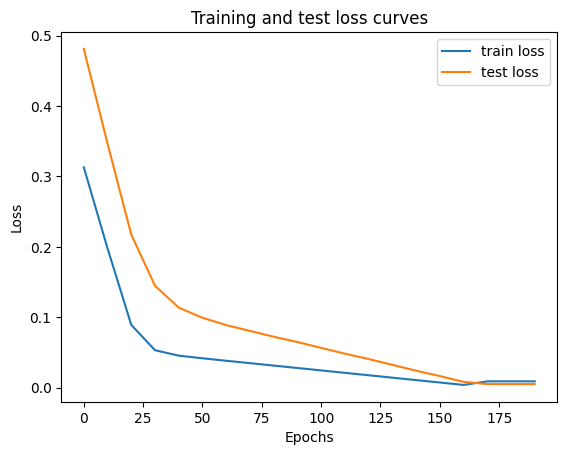

In [151]:
# plot the loss curves
plt.plot(epoch_count, train_loss_values, label="train loss")
plt.plot(epoch_count, test_loss_values, label="test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [152]:
with torch.inference_mode():
  y_preds = model_0(X_test)

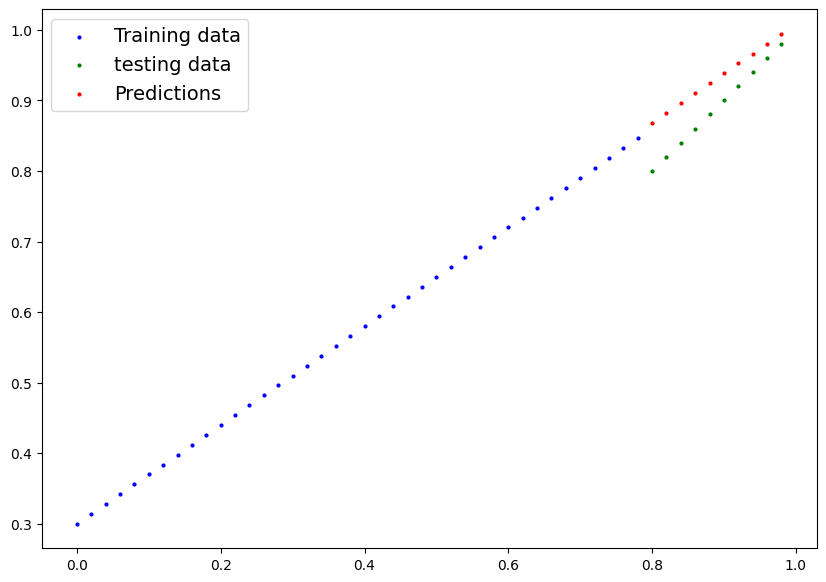

In [153]:
plot_predictions(predictions=y_preds)

## 4.Saving a model in pyTorch

 There are three main methods you should know about saving and loading models in PyTorch

 1.torch.save -> allows to save objext in pickle format.
 2.torch.load <br>

 3  torch.nn.Module.load_state_dict() -> allows to load a model's saved state dictionary.

In [154]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [155]:
#saving  our pyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH

# 3. save the model state dict
print(f" saving model to :{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

 saving model to :models/01_workflow.pth


In [156]:
!ls -1 models

01_workflow.pth


## 5.Loading a pyTorch model

Since we saved our model's 'state_dict()' rather the entire model, we create a new instance of our model class and saved "state_dict()" into that

In [157]:
# To load in saved state_dict() we have to instantiate a new onstance of our model class
loaded_model_0 = LinearRegressionModel()

#load the saved state_dict() of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))



<All keys matched successfully>

In [158]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [159]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [160]:
#compare loaded models preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6.Putting it all together

Let's go back through the steps above and see it all in one place.

In [161]:
#Import pYtorchand matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check pyTorch version
torch.__version__

'2.6.0+cu124'

Create device-agnostic code.

This means if we have got access to a GPU ,our code will use it . if no GPU is available , the code will default to using CPU.

In [162]:
#check the model current device
next(model_0.parameters()).device

device(type='cpu')

In [163]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [164]:
# Create some data using the linear regression formula of y=weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 10
step = 0.2

# Create X and y features and labels
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.2000],
         [0.4000],
         [0.6000],
         [0.8000],
         [1.0000],
         [1.2000],
         [1.4000],
         [1.6000],
         [1.8000]]),
 tensor([[0.3000],
         [0.4400],
         [0.5800],
         [0.7200],
         [0.8600],
         [1.0000],
         [1.1400],
         [1.2800],
         [1.4200],
         [1.5600]]))

In [165]:
# split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

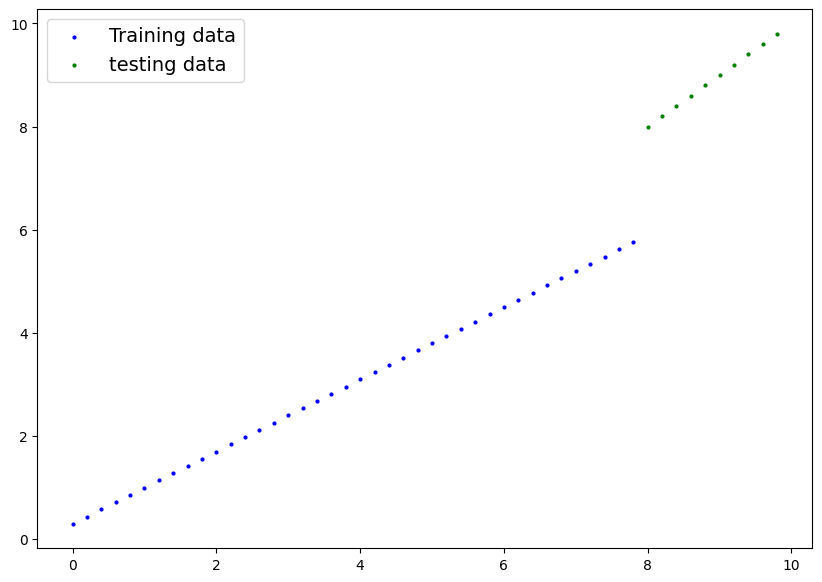

In [166]:
#plot the data
plot_predictions(X_train, y_train, X_test, y_test)


In [167]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #plot testing data in green
  plt.scatter(test_data, test_data , c='g' , s=4,label="testing data")

  # Are  there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #show legend
  plt.legend(prop={"size": 14})

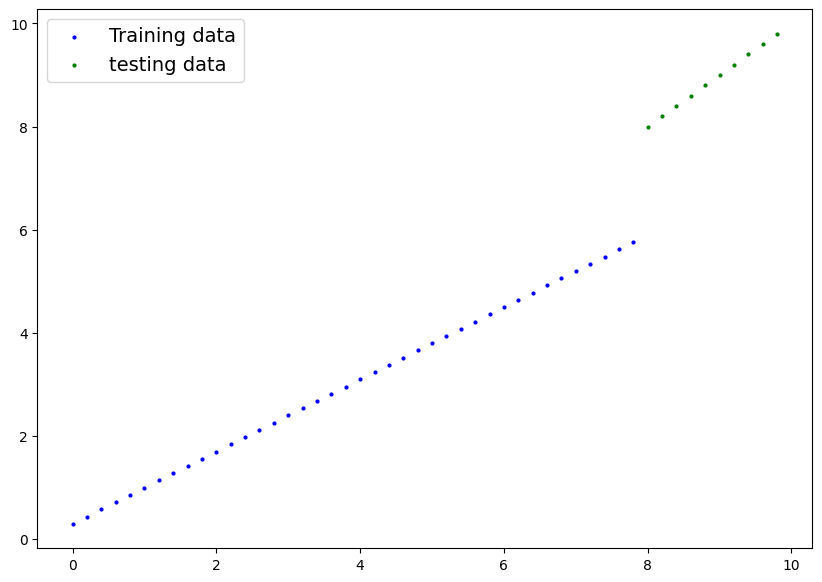

In [168]:
plot_predictions()

## 6.2 Build a pyTorch Linear model

In [169]:
# Create a linear model by subclassing nn.module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.linear() for creating the model parameter
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self ,x: torch.Tensor ) -> torch.Tensor :
   return self.linear_layer(x)

# set the menu seed
torch.manual_seed(42)

# Create an instance of the model
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [170]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.2000],
         [0.4000],
         [0.6000],
         [0.8000]]),
 tensor([[0.3000],
         [0.4400],
         [0.5800],
         [0.7200],
         [0.8600]]))

In [171]:
#set the model to use the  target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:
1. Loss function
2. Optimizer
3. Training loop
4. Testing loop

In [172]:
# Set up the loss function
loss_fn = nn.L1Loss()

# Set up the optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)


In [173]:
# Traing loop
torch.manual_seed(42)

epochs = 200

#put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero_grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.7817081809043884 | Test loss: 0.7473010420799255
Epoch: 10 | Loss: 0.19652661681175232 | Test loss: 0.2781277298927307
Epoch: 20 | Loss: 0.1793585866689682 | Test loss: 0.26216673851013184
Epoch: 30 | Loss: 0.16205456852912903 | Test loss: 0.22078542411327362
Epoch: 40 | Loss: 0.1448865681886673 | Test loss: 0.20482444763183594
Epoch: 50 | Loss: 0.12771852314472198 | Test loss: 0.18886347115039825
Epoch: 60 | Loss: 0.11042648553848267 | Test loss: 0.1483727991580963
Epoch: 70 | Loss: 0.09328257292509079 | Test loss: 0.13419309258460999
Epoch: 80 | Loss: 0.07640358060598373 | Test loss: 0.09459300339221954
Epoch: 90 | Loss: 0.121028833091259 | Test loss: 0.06384315341711044
Epoch: 100 | Loss: 0.07807107269763947 | Test loss: 0.03526773676276207
Epoch: 110 | Loss: 0.10453517735004425 | Test loss: 0.020058298483490944
Epoch: 120 | Loss: 0.10417435318231583 | Test loss: 0.045448970049619675
Epoch: 130 | Loss: 0.12074585258960724 | Test loss: 0.027390480041503906
Epoch: 1

In [174]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6644]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2995], device='cuda:0'))])

In [175]:
weight, bias

(0.7, 0.3)

### 6.4 Making and Evaluation Mode

In [176]:
#Turn model into evaluation
model_1.eval()

#TMake predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[5.6150],
        [5.7479],
        [5.8808],
        [6.0137],
        [6.1466],
        [6.2795],
        [6.4124],
        [6.5452],
        [6.6781],
        [6.8110]], device='cuda:0')

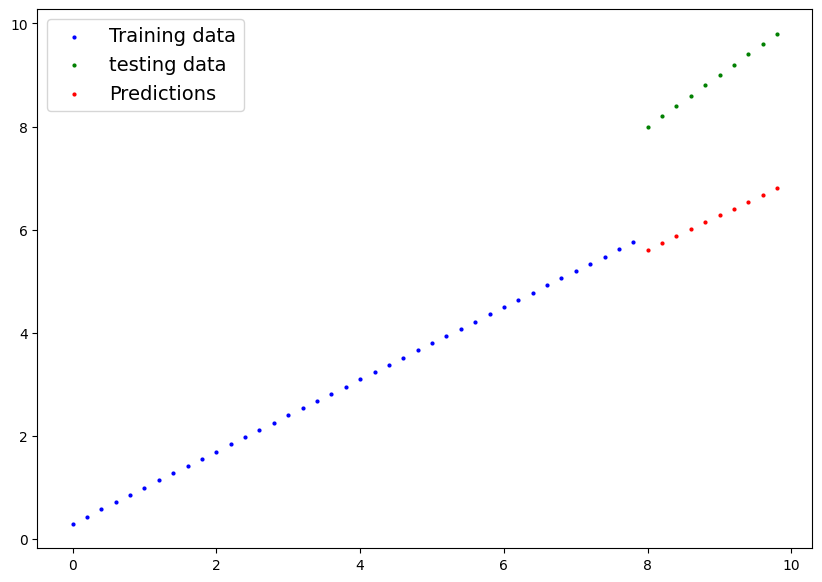

In [177]:
#plot the predictions
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving and loading model

In [178]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "01_workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_workflow.pth


In [179]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6644]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2995], device='cuda:0'))])

In [180]:
# Load a pyTorch
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [181]:
next(loaded_model_1.parameters()).device


device(type='cuda', index=0)

In [182]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6644]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2995], device='cuda:0'))])

In [186]:
#Turn model into evaluation
model_1.eval()

#TMake predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[5.6150],
        [5.7479],
        [5.8808],
        [6.0137],
        [6.1466],
        [6.2795],
        [6.4124],
        [6.5452],
        [6.6781],
        [6.8110]], device='cuda:0')